In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import math
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('USunemqt.csv', parse_dates= ['DATE'], index_col = 'DATE')
data = data.dropna()

datad = data.diff()
y = data.loc[:,'Unem']
y2 = y.shift(-2)
y2.name = 'Unemtplustwo'
y2 = y2.dropna()
data1 = data.iloc[:,1:]
datashift = data1.iloc[:,1:].shift(1)
datashift.columns = [str(col) + 'tone' for col in datashift.columns]
datashift2 = data1.iloc[:,1:].shift(2)
datashift2.columns = [str(col) + 'ttwo' for col in datashift2.columns]

datashift = datashift.join([datashift2,data1,y,y2])
datashift = datashift.dropna()
datashifts = datashift.diff()
data.info
print(datad)

                Unem    CPI  CurrentACT  Minwage  Immigration  NASDAQ  \
DATE                                                                    
1971-01-01       NaN    NaN         NaN      NaN          NaN     NaN   
1971-04-01 -0.033333  0.500       -0.38     0.00          0.0    1.83   
1971-07-01  0.133333  0.300       -0.04     0.00          0.0    1.23   
1971-10-01 -0.100000  0.300       -0.21     0.00          0.0    5.09   
1972-01-01 -0.166666  0.300       -0.16     0.00      14207.0   14.02   
1972-04-01 -0.066667  0.300        0.02     0.00          0.0    1.94   
1972-07-01 -0.133333  0.400        0.13     0.00          0.0   -0.47   
1972-10-01 -0.200000  0.400        0.06     0.00          0.0    4.12   
1973-01-01 -0.433334  0.900        0.38     0.00      13830.0  -16.27   
1973-04-01  0.000000  0.800        0.21     0.00          0.0  -16.48   
1973-07-01 -0.133333  1.000        0.51     0.00          0.0   10.22   
1973-10-01 -0.033333  1.100        0.15     0.00   

In [3]:
#Extract test dates for later
Datadate = pd.read_csv('USunemqt.csv')
dates = Datadate.iloc[140:173,0]
dates.columns = ['date']
#dates.to_csv('dates.csv')
dates

140    2005-Q3
141    2005-Q4
142    2006-Q1
143    2006-Q2
144    2006-Q3
145    2006-Q4
146    2007-Q1
147    2007-Q2
148    2007-Q3
149    2007-Q4
150    2008-Q1
151    2008-Q2
152    2008-Q3
153    2008-Q4
154    2009-Q1
155    2009-Q2
156    2009-Q3
157    2009-Q4
158    2010-Q1
159    2010-Q2
160    2010-Q3
161    2010-Q4
162    2011-Q1
163    2011-Q2
164    2011-Q3
165    2011-Q4
166    2012-Q1
167    2012-Q2
168    2012-Q3
169    2012-Q4
170    2013-Q1
171    2013-Q2
172    2013-Q3
Name: DATE, dtype: object

In [4]:

data = datashift.dropna()
lentrain = int(len(data)*.8)
train = data[:lentrain]
train_verifyset = train['Unemtplustwo']
train_ols_predset = train.drop('Unemtplustwo', axis =1)
test = data[lentrain:]
test_verifyset= test['Unemtplustwo']
test_ols_predset = test.drop('Unemtplustwo',axis = 1)
test_ols_predset


,CurrentACTtone,Minwagetone,Immigrationtone,NASDAQtone,RGDPtone,YthUnemtone,LaborFrctone,Hsingstrttone,Fedfundtone,CurrentACTttwo,...,CurrentACT,Minwage,Immigration,NASDAQ,RGDP,YthUnem,LaborFrc,Hsingstrt,Fedfund,Unem
DATE,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-5.68,5.15,957883.0,2175.44,13950.376,11.76667,148004.7,2042.0,2.16,-5.12,...,-5.28,5.15,1122257.0,1999.23,14099.081,11.93333,148261.3,1864,2.63,5.300000
2005-04-01,-5.28,5.15,1122257.0,1999.23,14099.081,11.93333,148261.3,1864.0,2.63,-5.68,...,-5.50,5.15,1122257.0,2056.96,14172.695,11.53333,149141.7,2068,3.04,5.100000
2005-07-01,-5.50,5.15,1122257.0,2056.96,14172.695,11.53333,149141.7,2068.0,3.04,-5.28,...,-5.59,5.15,1122257.0,2151.69,14291.757,10.86667,149721.7,2151,3.62,4.966667
2005-10-01,-5.59,5.15,1122257.0,2151.69,14291.757,10.86667,149721.7,2151.0,3.62,-5.50,...,-6.21,5.15,1122257.0,2205.32,14373.438,10.80000,150032.0,1994,4.16,4.966667
2006-01-01,-6.21,5.15,1122257.0,2205.32,14373.438,10.80000,150032.0,1994.0,4.16,-5.59,...,-5.75,5.15,1266129.0,2339.79,14546.119,10.56667,150556.0,1969,4.59,4.733333
2006-04-01,-5.75,5.15,1266129.0,2339.79,14546.119,10.56667,150556.0,1969.0,4.59,-6.21,...,-5.81,5.15,1266129.0,2172.09,14589.585,10.23333,151101.3,1802,4.99,4.633333
2006-07-01,-5.81,5.15,1266129.0,2172.09,14589.585,10.23333,151101.3,1802.0,4.99,-5.75,...,-6.17,5.15,1266129.0,2258.43,14602.633,10.73333,151585.0,1720,5.25,4.633333
2006-10-01,-6.17,5.15,1266129.0,2258.43,14602.633,10.73333,151585.0,1720.0,5.25,-5.81,...,-5.33,5.15,1266129.0,2415.29,14716.930,10.40000,152393.0,1649,5.24,4.433333
2007-01-01,-5.33,5.15,1266129.0,2415.29,14716.930,10.40000,152393.0,1649.0,5.24,-6.17,...,-5.58,5.15,1052415.0,2421.64,14726.022,10.06667,153059.3,1495,5.26,4.500000


In [5]:
trainlen= len(data)*0.8
train_data=data[:137]
test_data=data[137:]

In [6]:
#train_data.to_csv('train_data')
#test_data.to_csv('test_data')


# Arima

(array([5.16654294, 5.26715469]), array([0.23914648, 0.46055307]), array([[4.77318199, 5.55990389],
       [4.50961229, 6.02469708]]))
(array([5.03124016, 5.15058833]), array([0.23826814, 0.45901173]), array([[4.63932395, 5.42315637],
       [4.39558122, 5.90559544]]))
(array([4.91675949, 4.97658854]), array([0.23765003, 0.45790551]), array([[4.52585998, 5.30765899],
       [4.223401  , 5.72977608]]))
(array([4.90010947, 4.88002624]), array([0.23678492, 0.45614976]), array([[4.51063294, 5.28958599],
       [4.12972666, 5.63032582]]))
(array([4.60100335, 4.76610384]), array([0.23556443, 0.45368433]), array([[4.21353434, 4.98847236],
       [4.01985953, 5.51234816]]))
(array([4.61785344, 4.6450481 ]), array([0.23467077, 0.45185153]), array([[4.23185438, 5.00385251],
       [3.90181847, 5.38827773]]))
(array([4.61173556, 4.58638461]), array([0.23361769, 0.44985317]), array([[4.22746865, 4.99600246],
       [3.84644199, 5.32632724]]))
(array([4.27840685, 4.41867873]), array([0.2332198 , 0.

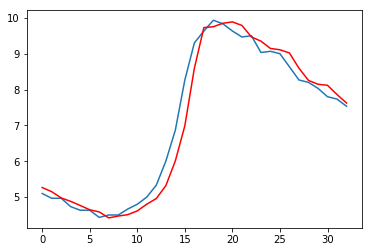

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  166
Model:                 ARIMA(3, 1, 4)   Log Likelihood                   0.596
Method:                       css-mle   S.D. of innovations              0.238
Date:                Tue, 28 Aug 2018   AIC                             16.807
Time:                        14:05:20   BIC                             44.815
Sample:                             1   HQIC                            28.176
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.050      0.191      0.849      -0.089       0.108
ar.L1.D.y     -0.1115      0.245     -0.456      0.649      -0.591       0.368
ar.L2.D.y     -0.6593      0.071     -9.220      0.0

In [7]:
###Working Rolling Model Arima Model

from pandas import datetime
from sklearn.metrics import mean_squared_error

datat = data['Unem']
datav = datat.values
lentrain = int(len(datat)*.805)
train = datav[:lentrain]
test = datav[lentrain:]
predictions = list()
confpred = []
#history = [x for x in train]
history = list(train)
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,4))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast(steps=2, alpha = 0.1)
    conf = output[2]
    print(output)
    conf = conf [1]
    
    yhat = output[0]
    confpred.append(conf)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print((yhat, obs))


predictions2 = np.delete(predictions,0, axis=1)
error = mean_squared_error(test, predictions2)**(1/2)
print('RMSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions2, color='red')
plt.show()
print(model_fit.summary())


In [8]:
confpred = np.asarray(confpred)
print(np.shape(confpred))
print(np.shape(predictions2))
print(predictions2)
print(confpred)

(33, 2)
(33, 1)
[[5.26715469]
 [5.15058833]
 [4.97658854]
 [4.88002624]
 [4.76610384]
 [4.6450481 ]
 [4.58638461]
 [4.41867873]
 [4.47120386]
 [4.50886494]
 [4.61391919]
 [4.80180003]
 [4.9595387 ]
 [5.31683379]
 [6.00807061]
 [6.99063079]
 [8.59079979]
 [9.72800054]
 [9.75325197]
 [9.84949169]
 [9.88689621]
 [9.78857022]
 [9.467521  ]
 [9.35034582]
 [9.14656967]
 [9.10952763]
 [9.01932786]
 [8.59380021]
 [8.25468556]
 [8.14791782]
 [8.11776877]
 [7.86055266]
 [7.62418885]]
[[ 4.50961229  6.02469708]
 [ 4.39558122  5.90559544]
 [ 4.223401    5.72977608]
 [ 4.12972666  5.63032582]
 [ 4.01985953  5.51234816]
 [ 3.90181847  5.38827773]
 [ 3.84644199  5.32632724]
 [ 3.68001221  5.15734526]
 [ 3.7314648   5.21094292]
 [ 3.77217668  5.2455532 ]
 [ 3.88102823  5.34681015]
 [ 4.07129472  5.53230533]
 [ 4.22952494  5.68955247]
 [ 4.58634881  6.04731877]
 [ 5.27149131  6.74464991]
 [ 6.24196424  7.73929734]
 [ 7.80029095  9.38130863]
 [ 8.93893371 10.51706738]
 [ 8.96145879 10.54504516]
 [ 9.060

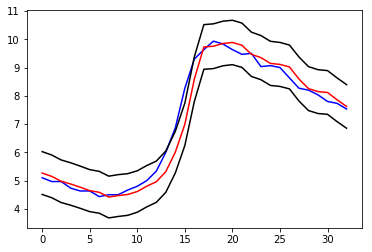

[[5.26715469]
 [5.15058833]
 [4.97658854]
 [4.88002624]
 [4.76610384]
 [4.6450481 ]
 [4.58638461]
 [4.41867873]
 [4.47120386]
 [4.50886494]
 [4.61391919]
 [4.80180003]
 [4.9595387 ]
 [5.31683379]
 [6.00807061]
 [6.99063079]
 [8.59079979]
 [9.72800054]
 [9.75325197]
 [9.84949169]
 [9.88689621]
 [9.78857022]
 [9.467521  ]
 [9.35034582]
 [9.14656967]
 [9.10952763]
 [9.01932786]
 [8.59380021]
 [8.25468556]
 [8.14791782]
 [8.11776877]
 [7.86055266]
 [7.62418885]]
33


In [9]:
#plt.plot(test)
plt.plot(test, color='b')
plt.plot(predictions2, color='red')
plt.plot(confpred, color ='black')
plt.show()
print(predictions2)
print(len(predictions2))

RMSE: 0.748


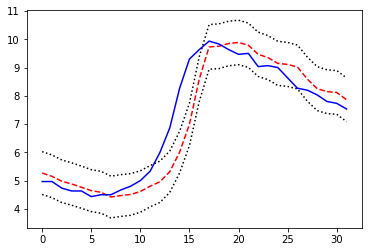

32
[4.966667 4.966667 4.733333 4.633333 4.633333 4.433333 4.5      4.5
 4.666667 4.8      5.       5.333333 6.       6.866667 8.266666 9.3
 9.633333 9.933333 9.833333 9.633333 9.466666 9.5      9.033334 9.066667
 9.       8.633333 8.266666 8.2      8.033334 7.8      7.733333 7.533333]


In [10]:

#Get in sample values of predictions
insamptest = test[1:]
insamppreds = predictions2[:-1]

error = mean_squared_error(insamppreds, insamptest)**(1/2)
print('RMSE: %.3f' % error)

#Get in sample values of intervals
confpred = confpred[:-1]

plt.plot(insamppreds, color='red', linestyle='dashed')
plt.plot(insamptest, color='b')
plt.plot(confpred, color = 'black', linestyle ='dotted')
#plt.savefig('arima.png')
plt.show()
print(len(insamptest))
print(insamptest)

In [11]:
#To Save predictions

#arimapred= pd.DataFrame(insamppreds)
#arimapred.to_csv('arimapred.csv')
#testfordb = pd.DataFrame(insamptest)
#testfordb.to_csv('evaluation.csv')

# VAR

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR #DynamicVAR

In [13]:


datad = datad.dropna()

lentrain = int(len(datad)*.795)

lentest = int(len(data) *(.795))


#extract test values
testdata = data[lentest:]
test_unem = testdata.loc[:,'Unem']

print(datad)


                Unem    CPI  CurrentACT  Minwage  Immigration  NASDAQ  \
DATE                                                                    
1971-04-01 -0.033333  0.500       -0.38     0.00          0.0    1.83   
1971-07-01  0.133333  0.300       -0.04     0.00          0.0    1.23   
1971-10-01 -0.100000  0.300       -0.21     0.00          0.0    5.09   
1972-01-01 -0.166666  0.300       -0.16     0.00      14207.0   14.02   
1972-04-01 -0.066667  0.300        0.02     0.00          0.0    1.94   
1972-07-01 -0.133333  0.400        0.13     0.00          0.0   -0.47   
1972-10-01 -0.200000  0.400        0.06     0.00          0.0    4.12   
1973-01-01 -0.433334  0.900        0.38     0.00      13830.0  -16.27   
1973-04-01  0.000000  0.800        0.21     0.00          0.0  -16.48   
1973-07-01 -0.133333  1.000        0.51     0.00          0.0   10.22   
1973-10-01 -0.033333  1.100        0.15     0.00          0.0  -19.01   
1974-01-01  0.366666  1.500       -0.48     0.00   

In [14]:
datad.iloc[0]

Unem            -0.033333
CPI              0.500000
CurrentACT      -0.380000
Minwage          0.000000
Immigration      0.000000
NASDAQ           1.830000
RGDP            27.589000
YthUnem          0.266670
LaborFrc       253.000000
Hsingstrt      116.000000
Fedfund          1.200000
Name: 1971-04-01 00:00:00, dtype: float64

C:\Users\Wil Grebner\Documents\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Wil Grebner\Documents\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Wil Grebner\Documents\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Wil Grebner\Documents\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Wil Grebner\Documents\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was pr

RMSE: 0.443


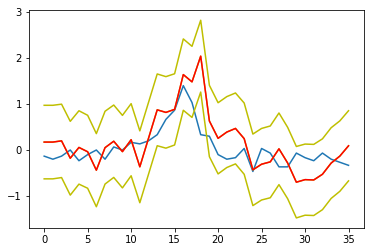

In [15]:

train = datad[:lentrain]
test = datad[lentrain:]
predictions = list()
varinterval = []
history=train
for t in range(len(test)):
    
    model = VAR(history)
    model_fit = model.fit(4)
    output = model_fit.forecast(model_fit.y,steps=2)
    #deletes all unneeded values from output.  We aren't comparing anything other than unem
    

    output2= output[:,0]
    #conf = output[2]
    two_step_pred =sum(output2)
    yhat = two_step_pred
    predictions.append(yhat)
    obs = test.iloc[range(t)]
    history = train.append(obs)
    varinterv = model_fit.forecast_interval(model_fit.y, steps=2, alpha=0.1)
    
    varinterv = np.asarray(varinterv)
    varinterv = np.sum(varinterv, axis = 1)
    varinterv = varinterv[:,0]
    
    varinterval.append(varinterv)

#predictions2 = np.delete(predictions,0, axis=1)
error = mean_squared_error(test['Unem'], predictions)**(1/2)
print('RMSE: %.3f' % error)
# plot
plt.plot(test['Unem'].values)
plt.plot(varinterval, color ='y')
plt.plot(predictions, color = 'r') 
plt.show()


In [16]:
varinterval = np.asarray(varinterval)
test_unem = np.asarray(test_unem)
print(predictions)
u_diff_pred = test_unem + predictions[1:]
u_diff_pred = np.asarray(u_diff_pred)
print(np.shape(varinterv))
print(varinterv)
print(test_unem)

[0.17259750879531402, 0.17259750879531402, 0.19888488120917755, -0.17870910879340005, 0.05579530394784506, -0.03832750611392094, -0.43889344258013707, 0.05117178188484096, 0.19099908645445693, -0.035283825984172006, 0.22393614147264615, -0.36551545232856025, 0.25531764227567033, 0.8738336022055302, 0.8183526568350366, 0.8841808766392036, 1.640600123697424, 1.4824134239115323, 2.041921285821582, 0.6305281749408258, 0.25431835136151204, 0.39003549515659597, 0.469369224793935, 0.2470127925417812, -0.4313241269180123, -0.3091550677615482, -0.25804395029589333, 0.026083718668465004, -0.28329168515121106, -0.7003613576320987, -0.644651495007112, -0.6514846436942399, -0.5278469019414298, -0.2844750226721109, -0.1325831877630653, 0.09155515054643591]
(3,)
[ 0.09155515 -0.67172639  0.85483669]
[5.433333 5.3      5.1      4.966667 4.966667 4.733333 4.633333 4.633333
 4.433333 4.5      4.5      4.666667 4.8      5.       5.333333 6.
 6.866667 8.266666 9.3      9.633333 9.933333 9.833333 9.633333 

In [17]:
varconfintup= test_unem + varinterval[1:,2]
varconfintdown = test_unem + varinterval[1:,1]
print(np.shape(varconfintup[:-1]))
print(np.shape(varconfintdown[:-1]))
print(np.shape(u_diff_pred[:-1]))


(34,)
(34,)
(34,)


In [18]:
test2 = np.asarray(test['Unem'])
undiff_test= list()
for i in range(1,(len(test2)+1)):
    x = 5.433333+ sum(test2[:i])
    undiff_test.append(x)
print(undiff_test)

[5.3, 5.1, 4.966667, 4.966667, 4.733333, 4.633333, 4.633333, 4.433333, 4.5, 4.5, 4.6666669999999995, 4.8, 5.0, 5.3333330000000005, 6.0, 6.866667, 8.266666, 9.3, 9.633333, 9.933333, 9.833333, 9.633333, 9.466666, 9.5, 9.033334, 9.066667, 9.0, 8.633333, 8.266666, 8.2, 8.033334, 7.8, 7.733333, 7.533333, 7.266667, 6.933333]


34
34
RMSE: 0.692


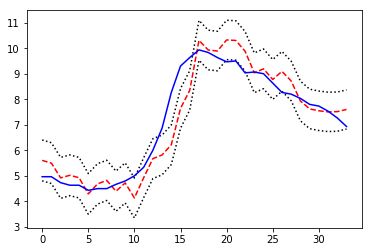

In [19]:
#Undifference the series using the starting value of the test set






#Now we need to get of values without a match in each oppposing set to take RMSE. This will align predictions with their matching actual value 



print(len(u_diff_pred[:-1]))
print(len(undiff_test[2:]))
error = mean_squared_error(u_diff_pred[:-3], undiff_test[2:-2])**(1/2)
print('RMSE: %.3f' % error)

plt.plot(u_diff_pred[:-1], linestyle = 'dashed',color = 'r')
plt.plot(varconfintup[:-1], linestyle = 'dotted', color = 'black')
plt.plot(varconfintdown[:-1], linestyle = 'dotted', color = 'black')

plt.plot(undiff_test[2:],color = 'b')
#plt.savefig('VAR.png')
plt.show()


In [20]:
varpred = u_diff_pred[:-3]
varpred = pd.DataFrame(varpred)
#varpred.to_csv('varpred.csv')
print(undiff_test[2:])

[4.966667, 4.966667, 4.733333, 4.633333, 4.633333, 4.433333, 4.5, 4.5, 4.6666669999999995, 4.8, 5.0, 5.3333330000000005, 6.0, 6.866667, 8.266666, 9.3, 9.633333, 9.933333, 9.833333, 9.633333, 9.466666, 9.5, 9.033334, 9.066667, 9.0, 8.633333, 8.266666, 8.2, 8.033334, 7.8, 7.733333, 7.533333, 7.266667, 6.933333]


# Principal Components

In [21]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.decomposition import PCA
data = pd.read_csv('USunemqt.csv', parse_dates= ['DATE'], index_col = 'DATE')

data = data.dropna()

datad = data.diff()

data1 = data.iloc[:,1:]
datashift = data1.iloc[:,1:].shift(1)
datashift.columns = [str(col) + 'tone' for col in datashift.columns]
datashift2 = data1.iloc[:,1:].shift(2)
datashift2.columns = [str(col) + 'ttwo' for col in datashift2.columns]

datashift = datashift.join([datashift2,data1,y])

datashifts = datashift.diff()
unem=(data.loc[:,'Unem'])
unem=np.asarray(unem)
unem=pd.DataFrame(unem)
standrd_df = sklearn.preprocessing.scale(data.iloc[:,1:], axis=0, with_mean=True, with_std=True, copy=True)
pc_array = np.append(unem,standrd_df)
print(np.shape(standrd_df))
print(np.shape(standrd_df))
print(pc_array)
print(np.shape(data))

(172, 10)
(172, 10)
[ 5.933333    5.9         6.033333   ...  1.33799303 -1.03279777
 -1.45371265]
(172, 11)


Lets try the two lag set.  This essentially performs regularization so should be okay

In [22]:
data = pd.read_csv('USunemqt.csv', parse_dates= ['DATE'], index_col = 'DATE')
#data = data.diff()
data = data.dropna()
#data = data.drop('YthUnem', axis = 1)

y = data.loc[:,'Unem']
y2 = y.shift(-2)
y2.name = 'Unemtplustwo'

y2 = y2.dropna()

#let's create lags for unemployment
ylag1= y.shift(1)
ylag1.name = 'Unem_one'
ylag2 = y.shift(2)
ylag2.name = 'Unem_two'
ylag3 = y.shift(3)
ylag3.name = 'Unem_three'
ylag4 = y.shift(4)
ylag4.name = 'Unem_four'

data =data.join(y2)
data = data.join([ylag1])
data = data.dropna()
#data = data.drop('Unem', axis =1)


lentrain = int(len(data)*.8)
train = data[:lentrain]

y3 = train.iloc[:,-1]
y3 = np.asarray(y3)
y3 = pd.DataFrame(y3)
train= train.drop('Unemtplustwo',axis =1)

pctoloc = ['Unem','Unem_one']
#seeing if autoregressive makes difference
unemtrain = train.loc[:,pctoloc]
unemtrain = np.asarray(unemtrain)
unemtrain = pd.DataFrame(unemtrain)
train = train.drop(pctoloc, axis = 1)

train = sklearn.preprocessing.scale(train, axis=0, with_mean=True, with_std=True, copy=True)
test = data[lentrain:]


#seeing if autoregressive makes difference
unemtest = test.loc[:,pctoloc]
unemtest = np.asarray(unemtest)
unemtest = pd.DataFrame(unemtest)
test = test.drop(pctoloc, axis = 1)

test_verifyset= test['Unemtplustwo']
test_ols_predset = test.drop('Unemtplustwo',axis = 1)
test_ols_predset = sklearn.preprocessing.scale(test_ols_predset, axis=0, with_mean=True, with_std=True, copy=True)
#train = np.asarray(train)
test_ols_predset = np.asarray(test_ols_predset)

y = y.iloc[:lentrain]


In [23]:
## Fitting components to trainset
n_comp=3
transtdrd_df = np.ndarray.transpose(train)
pca = PCA(n_components=n_comp)
pcfit = pca.fit(transtdrd_df)
print(pcfit.explained_variance_ratio_)
components = np.ndarray.transpose(pcfit.components_)
componentsdf = pd.DataFrame(components)




[0.58696835 0.1809021  0.09182164]


In [24]:
###fitting components to testset.  make sure n_components = train n_components

transtdrd_df = np.ndarray.transpose(test_ols_predset)
pca = PCA(n_components=n_comp)
pcfit = pca.fit(transtdrd_df)
print(pcfit.explained_variance_ratio_)

components = np.ndarray.transpose(pcfit.components_)
componentsdf_test = pd.DataFrame(components)

[0.7101109  0.17372895 0.06242842]


In [25]:
#add unadulterated unem back in
componentsdf = pd.concat([componentsdf, unemtrain], axis=1, ignore_index=True)
componentsdf_test = pd.concat([componentsdf_test, unemtest], axis=1, ignore_index=True)


In [26]:
componentsdf = sm.add_constant(componentsdf)
componentsdf_test = sm.add_constant(componentsdf_test)
results = sm.OLS(y3, componentsdf).fit()
#print(results.summary())


In [27]:

pcpred = results.predict(componentsdf)
pcpredtest = results.predict(componentsdf_test)
pcpredtest = pcpredtest.iloc[:-2]
test_verifyset=test_verifyset.dropna()


In [28]:
pcrpred = results.predict(componentsdf)
pcpredtest = results.predict(componentsdf_test)
pcpredtest = pcpredtest.iloc[:-2]
test_verifyset=test_verifyset.dropna()
test_verifyset=np.asarray(test_verifyset)
test_verifyset=pd.DataFrame(test_verifyset)
#print(mean_squared_error(undiffpred, undiff_verify)**(1/2))
#print(mean_squared_error(pcrpred, y3)**(1/2))

print(len(y3))
print(test_verifyset, y3,train)

135
           0
0   4.966667
1   4.966667
2   4.733333
3   4.633333
4   4.633333
5   4.433333
6   4.500000
7   4.500000
8   4.666667
9   4.800000
10  5.000000
11  5.333333
12  6.000000
13  6.866667
14  8.266666
15  9.300000
16  9.633333
17  9.933333
18  9.833333
19  9.633333
20  9.466666
21  9.500000
22  9.033334
23  9.066667
24  9.000000
25  8.633333
26  8.266666
27  8.200000
28  8.033334
29  7.800000
30  7.733333
31  7.533333
32  7.266667
33  6.933333             0
0    5.933333
1    5.900000
2    6.033333
3    5.933333
4    5.766667
5    5.700000
6    5.566667
7    5.366667
8    4.933333
9    4.933333
10   4.800000
11   4.766667
12   5.133333
13   5.200000
14   5.633333
15   6.600000
16   8.266666
17   8.866667
18   8.466666
19   8.300000
20   7.733333
21   7.566667
22   7.733333
23   7.766667
24   7.500000
25   7.133333
26   6.900000
27   6.666667
28   6.333333
29   6.000000
..        ...
105  5.000000
106  4.866667
107  4.666667
108  4.633333
109  4.400000
110  4.533333
111  4.43

# PC Rolling Attempt

In [29]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#make it squared
ncomps = n_comp+1
componentsdfsquare = componentsdf.iloc[:,1:ncomps] **2
componentsdf_testsquare = componentsdf_test.iloc[:,1:ncomps] **2
componentsdf = pd.concat([componentsdf, componentsdfsquare], axis=1, ignore_index=True)
componentsdf_test = pd.concat([componentsdf_test, componentsdf_testsquare], axis=1, ignore_index=True)

#make it solo squared
#todrop = componentsdf.iloc[:,1:ncomps]
#componentsdf = componentsdf.drop(todrop, axis = 1)
#todropt = componentsdf_test.iloc[:,1:ncomps]
#componentsdf_test = componentsdf_test.drop(todropt, axis = 1) 
#make it cubic
#componentsdfcube = componentsdf.iloc[:,1:6] **3
#componentsdf_testcube = componentsdf_test.iloc[:,1:6]**3
#componentsdf = pd.concat([componentsdf, componentsdfcube], axis=1, ignore_index=True)
#componentsdf_test = pd.concat([componentsdf_test, componentsdf_testcube], axis=1, ignore_index=True)


In [30]:
predictions = list()
comp_history=componentsdf

iv_low=[]
iv_up= list()
stddev = []

dep_history=y3

for t in range(1,len(test_verifyset)):
   
    predictors = componentsdf_test.iloc[range(t)]
  
    dependent_var = test_verifyset.iloc[range(t)]


    results = sm.OLS(dep_history, comp_history).fit()
    
    pcrpred = np.asarray(results.predict(predictors))
    

    pcrpred = pcrpred[-1:]
    
    predicitons = predictions.append(pcrpred)
    
    comp_history = componentsdf.append(predictors, ignore_index=True)
    
    dep_history = y3.append(dependent_var, ignore_index=True)
  
    prstd, iv_l, iv_u = wls_prediction_std(results, alpha = 0.1 )
    
    
    prstd = np.asarray(prstd)
    std = prstd[-1]
    stddev.append(std)


 
    

    
predictions = np.ravel(predictions)
predictions = predictions
predictions = pd.DataFrame(predictions)
predictions = np.asarray(predictions)
print(results.summary()) 



                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     532.1
Date:                Tue, 28 Aug 2018   Prob (F-statistic):          4.40e-110
Time:                        14:05:29   Log-Likelihood:                -33.931
No. Observations:                 167   AIC:                             85.86
Df Residuals:                     158   BIC:                             113.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1175      0.132     -0.889      0.3

In [31]:
#so matplotlib plots it right
test_verifyset= np.asarray(test_verifyset)

In [32]:
deviation = np.asarray(stddev) * 1.655
predictions = predictions.reshape(33)
np.shape(deviation)

(33,)

In [33]:

print(deviation)
low = predictions - deviation
high = predictions + deviation

print(np.shape(test_verifyset))
print(mean_squared_error(predictions[:], test_verifyset[:-1] )**(1/2))
print(results.summary())

[1.03264858e-14 3.32426440e-02 2.92290507e-02 3.32430576e-02
 3.64687385e-02 3.94374816e-02 3.60998138e-02 3.87799138e-02
 3.85042263e-02 5.28686064e-02 6.43826743e-02 8.17829346e-02
 1.05126520e-01 1.83880689e-01 2.80174145e-01 4.18554811e-01
 5.03162296e-01 5.38886180e-01 5.04602300e-01 4.93711824e-01
 4.87117465e-01 4.96055805e-01 5.03108055e-01 5.04185155e-01
 5.09853725e-01 5.05343960e-01 5.04470500e-01 5.09827472e-01
 5.17060297e-01 5.32575672e-01 5.28543194e-01 5.31294822e-01
 5.26705262e-01]
(34, 1)
0.7643468390198634
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     532.1
Date:                Tue, 28 Aug 2018   Prob (F-statistic):          4.40e-110
Time:                        14:05:29   Log-Likelihood:                -3

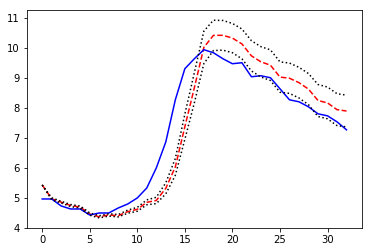

In [34]:
plt.plot(predictions[:], color ='r', linestyle = 'dashed')
plt.plot(test_verifyset[:-1], color='b')
plt.plot(high[:], color = 'black', linestyle = 'dotted')
plt.plot(low[:], color = 'black', linestyle = 'dotted')
#plt.savefig('pc.png')
#plt.savefig('pcsquare.png')
plt.show()


In [35]:
PCpred = predictions
#PCpred = PCpred.iloc[:,0]

print(type(PCpred))
#pcpred = np.savetxt('Pcpred.txt',PCpred)
#  you'll probably want to use the txt, to get rid of all the array nonsense
#PCpred.to_csv('PCpred.csv')
#PCsquarepred = pd.DataFrame(predictions)
#PCsquarepred.to_csv('PCsquarepred.csv')
#np.savetxt('pcsquare.txt',PCpred)

<class 'numpy.ndarray'>


### Recursive OLS

In [36]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

data = pd.read_csv('USunemqt.csv')#, parse_dates= ['DATE'], index_col = 'DATE')
data = data.dropna()
data = data.drop('DATE', axis=1)
datad = data.diff()
y = data.loc[:,'Unem']
y2 = y.shift(-2)

y2.name = 'Unemtplustwo'
y2 = y2.dropna()
data1 = data.iloc[:,:]
datashift = data.iloc[:,:].shift(1)
datashift.columns = [str(col) + 'tone' for col in datashift.columns]
datashift2 = data.iloc[:,:].shift(2)
datashift2.columns = [str(col) + 'ttwo' for col in datashift2.columns]
datashift3 = data.iloc[:,:].shift(3)
datashift3.columns = [str(col) + 'tthree' for col in datashift3.columns]
datashift4 =data.iloc[:,:].shift(4)
datashift4.columns = [str(col) + 'tfour' for col in datashift4.columns]
datashift = datashift.join([datashift2,datashift3, datashift4, data1,y2])

datashift = datashift.dropna()
datashifts = datashift.diff()
data.info
print(datashift)

     Unemtone  CPItone  CurrentACTtone  Minwagetone  Immigrationtone  \
6    5.933333   41.100           -0.39         1.60         370478.0   
7    5.766667   41.400           -0.55         1.60         384685.0   
8    5.700000   41.700           -0.53         1.60         384685.0   
9    5.566667   42.100           -0.40         1.60         384685.0   
10   5.366667   42.500           -0.34         1.60         384685.0   
11   4.933333   43.400            0.04         1.60         398515.0   
12   4.933333   44.200            0.25         1.60         398515.0   
13   4.800000   45.200            0.76         1.60         398515.0   
14   4.766667   46.300            0.91         1.60         398515.0   
15   5.133333   47.800            0.43         1.60         393919.0   
16   5.200000   49.000            0.03         2.00         393919.0   
17   5.633333   50.600           -0.08         2.00         393919.0   
18   6.600000   51.900            0.13         2.00         3939

In [37]:

data = datashift.dropna()

lentrain = int(len(data)*.795)
train = data[:lentrain]
train_verifyset = train['Unemtplustwo']
train_ols_predset = train.drop('Unemtplustwo', axis =1)
test = data[lentrain:]
test_verifyset= test['Unemtplustwo']
test_ols_predset = test.drop('Unemtplustwo',axis = 1)
test_ols_predset


#train_verifyset = np.asarray(train_verifyset)
#train_ols_predset = np.asarray(train_ols_predset)
#test_verifyset = np.asarray(test_verifyset)
#test_ols_predset= np.asarray(test_ols_predset)
#np.reshape(train_verifyset, (117,1))
print(train_verifyset)
print(train_ols_predset)

6      5.566667
7      5.366667
8      4.933333
9      4.933333
10     4.800000
11     4.766667
12     5.133333
13     5.200000
14     5.633333
15     6.600000
16     8.266666
17     8.866667
18     8.466666
19     8.300000
20     7.733333
21     7.566667
22     7.733333
23     7.766667
24     7.500000
25     7.133333
26     6.900000
27     6.666667
28     6.333333
29     6.000000
30     6.033333
31     5.900000
32     5.866667
33     5.700000
34     5.866667
35     5.966667
         ...   
107    4.666667
108    4.633333
109    4.400000
110    4.533333
111    4.433333
112    4.300000
113    4.266667
114    4.233333
115    4.066667
116    4.033333
117    3.933333
118    4.000000
119    3.900000
120    4.233333
121    4.400000
122    4.833333
123    5.500000
124    5.700000
125    5.833333
126    5.733333
127    5.866667
128    5.866667
129    6.133333
130    6.133333
131    5.833333
132    5.700000
133    5.600000
134    5.433333
135    5.433333
136    5.300000
Name: Unemtplustwo, Leng

In [38]:
print(np.shape(train))
print(np.shape(test))
print(np.shape(test_ols_predset))
testvar=(test.iloc[:,:-1])

print(test_verifyset)

(131, 56)
(35, 56)
(35, 55)
137    5.100000
138    4.966667
139    4.966667
140    4.733333
141    4.633333
142    4.633333
143    4.433333
144    4.500000
145    4.500000
146    4.666667
147    4.800000
148    5.000000
149    5.333333
150    6.000000
151    6.866667
152    8.266666
153    9.300000
154    9.633333
155    9.933333
156    9.833333
157    9.633333
158    9.466666
159    9.500000
160    9.033334
161    9.066667
162    9.000000
163    8.633333
164    8.266666
165    8.200000
166    8.033334
167    7.800000
168    7.733333
169    7.533333
170    7.266667
171    6.933333
Name: Unemtplustwo, dtype: float64


In [39]:
predictionsols = list()
history=train


iv_low=[]
iv_up= list()

for t in range(len(test_verifyset)):
   
    
    
    predictors = test.iloc[range(t)]
    
  
    
    formula = ('Unemtplustwo ~ Unemtone + Unemttwo+ Unem + CurrentACTtone + Minwagetone + Immigrationtone + NASDAQtone + RGDPtone  + LaborFrctone + Hsingstrttone + Fedfundtone + CurrentACTttwo + Minwagettwo + Immigrationttwo + NASDAQttwo + RGDPttwo  + LaborFrcttwo + Hsingstrtttwo + Fedfundttwo + CPI + CurrentACT + Minwage + Immigration + NASDAQ + RGDP   + LaborFrc + Hsingstrt + Fedfund')
    #formula = ('Unemtplustwo ~Unem +Unemtone+ CPI + CurrentACT + Minwage + Immigration + NASDAQ + RGDP + LaborFrc + Hsingstrt + Fedfund')
    
    ols = smf.ols(formula = formula, data = history).fit()
    
    olspred = np.asarray(ols.predict(predictors))
    
   
    olspred = olspred[-1:]
    predictionsols.append(olspred)
   
    prstd, iv_l, iv_u = wls_prediction_std(ols, alpha = 0.1)
    
    iv_u = np.asarray(iv_u)
    iv_u = iv_u[-1]
    iv_up.append(iv_u) 
    
    iv_l = np.asarray(iv_l)
    iv_l = iv_l[-1]
    iv_low.append(iv_l)
    obs = test.iloc[range(t)]
    history = train.append(predictors)
    
 

    
    
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:           Unemtplustwo   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     116.4
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           6.10e-81
Time:                        14:05:34   Log-Likelihood:                -43.902
No. Observations:                 164   AIC:                             145.8
Df Residuals:                     135   BIC:                             235.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8213      1.739     

In [40]:
print(np.shape(predictionsols))
print(np.shape(test))
print(np.shape(test_verifyset
     ))
print(test)

(35,)
(35, 56)
(35,)
     Unemtone  CPItone  CurrentACTtone  Minwagetone  Immigrationtone  \
137  5.433333  189.800           -5.12         5.15         957883.0   
138  5.433333  191.700           -5.68         5.15         957883.0   
139  5.300000  193.100           -5.28         5.15        1122257.0   
140  5.100000  193.700           -5.50         5.15        1122257.0   
141  4.966667  198.800           -5.59         5.15        1122257.0   
142  4.966667  198.100           -6.21         5.15        1122257.0   
143  4.733333  199.700           -5.75         5.15        1266129.0   
144  4.633333  201.800           -5.81         5.15        1266129.0   
145  4.633333  202.800           -6.17         5.15        1266129.0   
146  4.433333  203.100           -5.33         5.15        1266129.0   
147  4.500000  205.288           -5.58         5.15        1052415.0   
148  4.500000  207.234           -5.22         5.15        1052415.0   
149  4.666667  208.547           -4.64     

In [41]:
#must drop first because the value doesn't exist
predictionsolscorrected = predictionsols[1:-1]

predictionsolscorrected = np.ravel(predictionsolscorrected)
iv_upcorr = iv_up[2:]
iv_lowcorr = iv_low[2:]
test_verifysetcorrected = (test_verifyset[1:-1])
test_verifysetcorrected.index = dates

#predictionsolscorrected = pd.DataFrame(predictionsolscorrected)
#predictionsolscorrected.index = dates
#iv_upcorr = pd.DataFrame(iv_upcorr)
#iv_lowcorr = pd.DataFrame(iv_lowcorr)
#iv_upcorr.index = dates
#iv_lowcorr.index = dates

In [42]:

plt.plot(test_verifysetcorrected, color = 'blue')
plt.plot(iv_upcorr, color = 'black', linestyle = 'dotted')
plt.plot(iv_lowcorr, color = 'black', linestyle = 'dotted')
plt.plot(predictionsolscorrected, color='r', linestyle = 'dashed')
#plt.savefig('ols.png')
plt.show()
print(np.shape(test_verifysetcorrected))
print(np.shape(predictionsolscorrected))

ValueError: could not convert string to float: '2013-Q3'

In [ ]:
error = mean_squared_error(predictionsolscorrected, test_verifysetcorrected) **(1/2)
print(error)
print(predictors)
print(test_verifysetcorrected)

In [ ]:
print(test_verifyset)

In [ ]:
#olspred= pd.DataFrame(predictionsolscorrected[:-1])
#olspred.to_csv('Olspred.csv')